# DS 2500 – Final Project: Book Sales and GoodReads Rating

---
*NOTE: My final project proposal asks a different question and uses different data sets, however after further inspection the data sets were incomplete and not usable. I got permission to switch my project from Professor Marina Kogan.



Lindsey Henyan

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf
from scipy.stats import f_oneway



#Formulate your questions

What is the relationship between the average rating of books, considering factors such as authors, publication date, language, copies sold, and ratings count?



#Read in your data

Github Repos [Best-Selling Books and GoodReads Ratings](https://github.com/harsh1399/DS2500-Data_Wrangling/tree/main/Module_Assignment-3/Book_sales_and_Goodreads_ratings).

In [ ]:
books_df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-3/Book_sales_and_Goodreads_ratings/combining-3-books.csv',
                           usecols = ['title', 'author', 'language', 'year', 'copiesSold', 'genre'])
goodreads_df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-3/Book_sales_and_Goodreads_ratings/combining-3-goodreads.csv',
                           usecols = ['bookID','title','authors','average_rating','isbn','isbn13','language_code','  num_pages','ratings_count','text_reviews_count','publication_date','publisher'])

#Check the packaging

In [ ]:
books_df.shape

(166, 6)

In [ ]:
goodreads_df.shape

(11127, 12)

#Look at the top and bottom of data

In [ ]:
books_df.head()

,title,author,language,year,copiesSold,genre
0,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[17][18],Fantasy
1,The Little Prince,Antoine de Saint-Exupéry,French,1943,100 million[19],Novella
2,Dream of the Red Chamber,Cao Xueqin,Chinese,1800,100 million[19],Family saga
3,The Hobbit,J. R. R. Tolkien,English,1937,100 million[19],Fantasy
4,And Then There Were None,Agatha Christie,English,1939,100 million[20],Mystery


In [ ]:
goodreads_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [ ]:
books_df.tail()

,title,author,language,year,copiesSold,genre
161,The Goal,Eliyahu M. Goldratt,English,1984,10 million[169],NaN
162,Fahrenheit 451,Ray Bradbury,English,1953,10 million[170],NaN
163,Angela's Ashes,Frank McCourt,English,1996,10 million[171],NaN
164,The Story of My Experiments with Truth (સત્યના...,Mohandas Karamchand Gandhi,Gujarati,1925,10 million[172],NaN
165,Bridget Jones's Diary,Helen Fielding,English,10,NaN,NaN


In [ ]:
goodreads_df.tail()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco
11126,45641,Las aventuras de Tom Sawyer,Mark Twain,3.91,8497646983,9788497646987,spa,272,113,12,5/28/2006,Edimat Libros


#Join The Data Sets

Check the similarities between columns

In [ ]:
set(books_df.columns) & set(goodreads_df.columns)

{'title'}

In [ ]:
"There are {0:,} unique values in the 'books_df'".format(len(books_df['title'].unique()))

"There are 166 unique values in the 'books_df'"

In [ ]:
"There are {0:,} unique values in the 'goodreads_df'".format(len(goodreads_df['title'].unique()))

"There are 10,351 unique values in the 'goodreads_df'"

In [ ]:
in_books_but_not_goodreads_set = set(books_df['title']) - set(goodreads_df['title'])
in_goodreads_but_not_books_set = set(goodreads_df['title']) - set(books_df['title'])

print("There are {0:,} \"title\"s in books_df but not in goodreads_df.".format(len(in_books_but_not_goodreads_set)))
print("There are {0:,} \"title\"s in goodreads_df but not in books_df.".format(len(in_goodreads_but_not_books_set)))

There are 121 "title"s in books_df but not in goodreads_df.
There are 10,306 "title"s in goodreads_df but not in books_df.


Check for duplicates.

In [ ]:
books_df['title'].value_counts().head()

title
Harry Potter and the Philosopher's Stone             1
The Book Thief                                       1
Goodnight Moon                                       1
The Neverending Story (Die unendliche Geschichte)    1
Fifty Shades of Grey                                 1
Name: count, dtype: int64

In [ ]:
goodreads_df['title'].value_counts().head()

title
The Iliad                 9
The Brothers Karamazov    9
'Salem's Lot              8
Gulliver's Travels        8
The Odyssey               8
Name: count, dtype: int64

Join the data sets using inner join

In [ ]:
reading_inner_df = pd.merge(left = books_df,
                                  right = goodreads_df,
                                  left_on = 'title',
                                  right_on = 'title',
                                  how='inner')

Check shape

In [ ]:
print("There are {0:,} rows and {1:,} columns.".format(*reading_inner_df.shape))

There are 83 rows and 17 columns.


Test for duplicates and unique variables to make sure the two sets joined correctly.

In [ ]:
print("There are {:,} unique values.".format(len(reading_inner_df['title'].unique())))
print(reading_inner_df['title'].value_counts().head())

There are 45 unique values.
title
The Great Gatsby       6
Pride and Prejudice    5
Charlotte's Web        5
Lolita                 4
Fahrenheit 451         3
Name: count, dtype: int64


# Clean the Data : Mean
Ordering the columns with missing data from greatest to least.


In [ ]:
reading_inner_df.head()

,title,author,language,year,copiesSold,genre,bookID,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,The Hobbit,J. R. R. Tolkien,English,1937,100 million[19],Fantasy,5907,J.R.R. Tolkien,4.27,0618260307,9780618260300,eng,366,2530894,32871,8/15/2002,Houghton Mifflin
1,The Hobbit,J. R. R. Tolkien,English,1937,100 million[19],Fantasy,5915,J.R.R. Tolkien,4.27,0261103288,9780261103283,eng,277,3213,329,9/17/2007,HarperCollins
2,And Then There Were None,Agatha Christie,English,1939,100 million[20],Mystery,16299,Agatha Christie,4.26,0312330871,9780312330873,eng,264,625767,18785,5/3/2004,St. Martin's Press
3,And Then There Were None,Agatha Christie,English,1939,100 million[20],Mystery,22160,Agatha Christie/Hugh Fraser,4.26,1572704497,9781572704497,eng,0,214,49,10/15/2004,Audiogo
4,The Da Vinci Code,Dan Brown,English,2003,80 million[25],Mystery thriller,969,Dan Brown,3.84,076792603X,9780767926034,eng,467,1120,105,3/28/2006,Broadway Books


In [ ]:
reading_inner_df.isnull().sum().sort_values(ascending=False)

genre                 54
title                  0
isbn                   0
publication_date       0
text_reviews_count     0
ratings_count          0
  num_pages            0
language_code          0
isbn13                 0
average_rating         0
author                 0
authors                0
bookID                 0
copiesSold             0
year                   0
language               0
publisher              0
dtype: int64

Drop the genre column because there was 54 missing entires.

In [ ]:
reading_inner_df.drop('genre', axis=1, inplace=True)

Turn copies sold and number of pages into an integer, and average rating into a float.

In [ ]:
def convert_to_integer(value_str):
    try:
        # Extract the numerical part and convert it to an integer
        numerical_part = value_str.split()[0]
        integer_value = int(numerical_part) * 1000000
        return integer_value
    except (ValueError, IndexError):
        return None

reading_inner_df['copiesSold'] = reading_inner_df['copiesSold'].apply(convert_to_integer)
reading_inner_df['  num_pages'] = reading_inner_df['  num_pages'].astype(int)
reading_inner_df['average_rating'] = reading_inner_df['average_rating'].astype(float)

Rename num_pages to remove the spaces

In [ ]:
reading_inner_df = reading_inner_df.rename(columns={'  num_pages': 'num_pages'})

#Check the "n"s

Checking if the ratings, sales, of best-selling books make sense.

In [ ]:
print("Min: " + str(reading_inner_df['average_rating'].min()))
print("Max: " + str(reading_inner_df['average_rating'].max()))

Min: 3.64
Max: 4.37


In [ ]:
print("Min: " + str(reading_inner_df['copiesSold'].min()))
print("Max: " + str(reading_inner_df['copiesSold'].max()))

Min: 10000000.0
Max: 100000000.0


In [ ]:
print("Min: " + str(reading_inner_df['publication_date'].min()))
print("Max: " + str(reading_inner_df['publication_date'].max()))

Min: 1/1/1978
Max: 9/6/2005


#Validate against an external data source




Does the books listed in the best-selling list make sense?

In [ ]:
reading_inner_df['title'].value_counts().head(15)

title
The Great Gatsby                           6
Pride and Prejudice                        5
Charlotte's Web                            5
Lolita                                     4
Fahrenheit 451                             3
Adventures of Huckleberry Finn             3
The Lovely Bones                           3
To Kill a Mockingbird                      3
James and the Giant Peach                  3
Matilda                                    3
Nineteen Eighty-Four                       2
The Outsiders                              2
How to Win Friends and Influence People    2
And Then There Were None                   2
The Grapes of Wrath                        2
Name: count, dtype: int64

After reviewing the list of best-selling books, the data seems correct since the books listed are quite popular among various age groups as well as being within mainstream media.

#Make a plot


Text(0.5, 1.0, 'Published Year vs Average Rating for best-selling books')

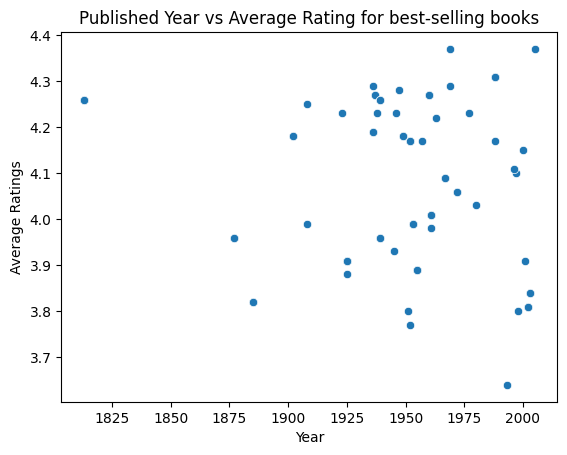

In [ ]:
sb.scatterplot(x=reading_inner_df['year'], y=reading_inner_df['average_rating'])
plt.xlabel('Year')
plt.ylabel('Average Ratings')
plt.title('Published Year vs Average Rating for best-selling books')

Text(0.5, 1.0, 'Copies Sold vs Average Rating for best-selling books')

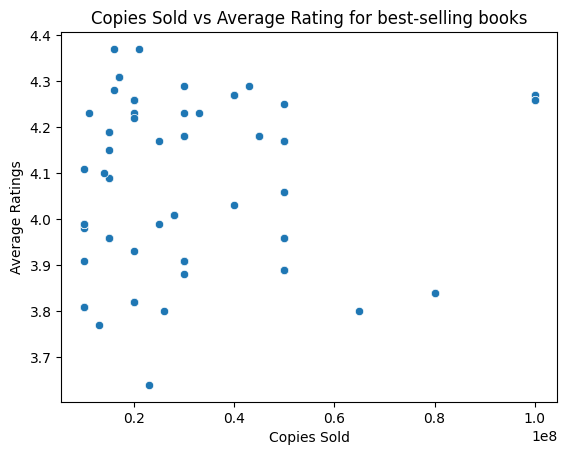

In [ ]:
sb.scatterplot(x=reading_inner_df['copiesSold'], y=reading_inner_df['average_rating'])
plt.xlabel('Copies Sold')
plt.ylabel('Average Ratings')
plt.title('Copies Sold vs Average Rating for best-selling books')

Text(0.5, 1.0, 'Number of Pages vs Average Rating for best-selling books')

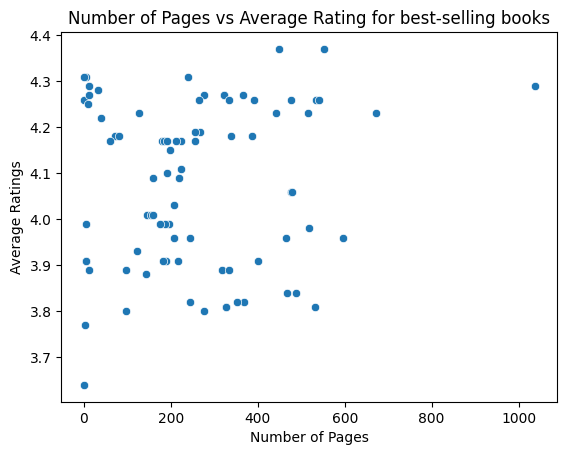

In [ ]:
sb.scatterplot(x=reading_inner_df['num_pages'], y=reading_inner_df['average_rating'])
plt.xlabel('Number of Pages')
plt.ylabel('Average Ratings')
plt.title('Number of Pages vs Average Rating for best-selling books')

Check Author's Distribution

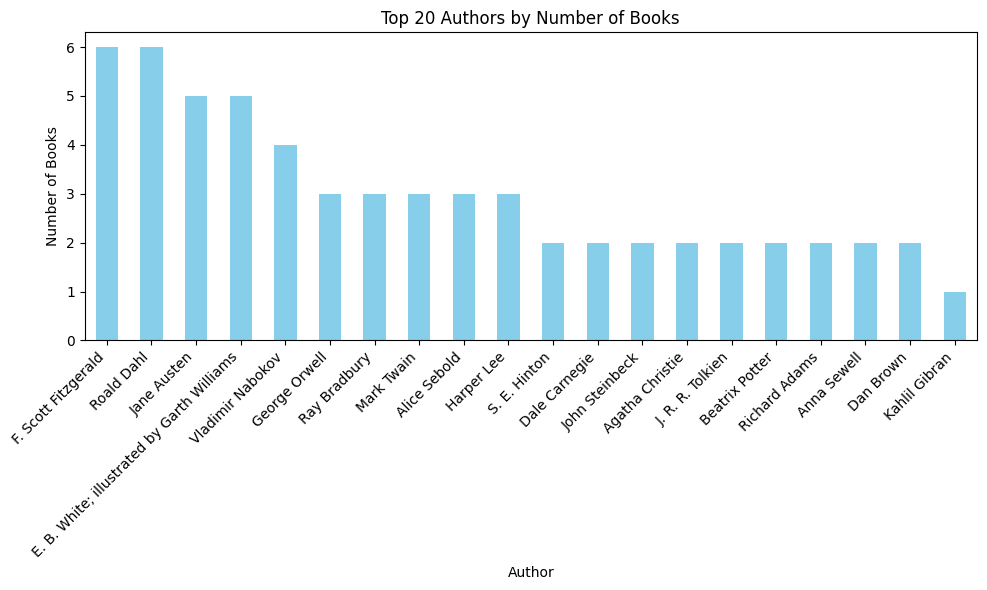

In [ ]:
author_counts = reading_inner_df['author'].value_counts()

# Select the top 20 authors based on book count
top_authors = author_counts.head(20)

# Create a histogram for the top 20 authors
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Top 20 Authors by Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

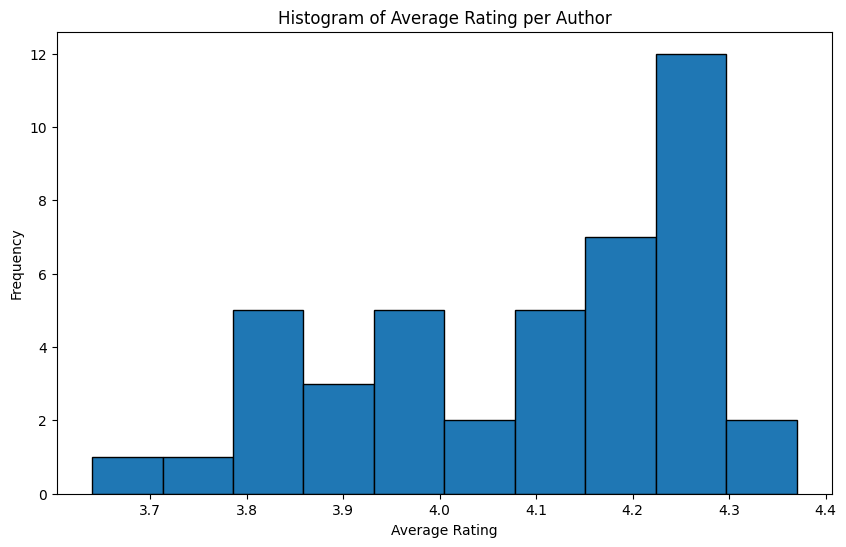

In [ ]:
# Calculate average rating per author
avg_rating_per_author = reading_inner_df.groupby('author')['average_rating'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(avg_rating_per_author, bins=10, edgecolor='black')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Average Rating per Author')
plt.show()

Heat Map with the Quantitative Variables

<Axes: >

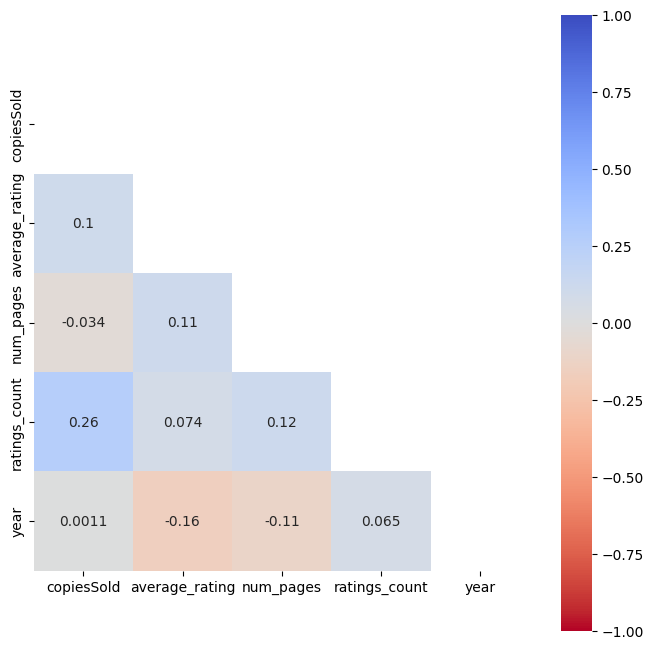

In [ ]:
books_corr =  reading_inner_df[['copiesSold','average_rating','num_pages','ratings_count', 'year']].corr()

books_mask = np.zeros_like(books_corr)
books_mask[np.triu_indices_from(books_mask)] = True

# Set up the plotting environment
f,ax = plt.subplots(1,1,figsize=(8,8))

# Make a heatmap
sb.heatmap(books_corr,vmin=-1,vmax=1,mask=books_mask,annot=True,square=True,ax=ax,cmap='coolwarm_r')

Look at the spread of different publishers

In [ ]:
gatsby_df = reading_inner_df.loc[reading_inner_df['title'] == "The Great Gatsby"]
gatsby_df

,title,author,language,year,copiesSold,bookID,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
29,The Great Gatsby,F. Scott Fitzgerald,English,1925,30000000.0,4673,Kathleen Parkinson/F. Scott Fitzgerald,3.88,0140771972,9780140771978,eng,144,557,28,11/25/2003,Penguin Global
30,The Great Gatsby,F. Scott Fitzgerald,English,1925,30000000.0,4674,F. Scott Fitzgerald/Tim Robbins,3.91,0060098910,9780060098919,eng,6,258,58,10/1/2002,Caedmon
31,The Great Gatsby,F. Scott Fitzgerald,English,1925,30000000.0,4675,F. Scott Fitzgerald/Alexander Scourby,3.91,1572702567,9781572702561,eng,4,63,13,3/13/2002,Audio Partners
32,The Great Gatsby,F. Scott Fitzgerald,English,1925,30000000.0,4677,F. Scott Fitzgerald,3.91,0140620184,9780140620184,eng,188,2729,245,1/13/1994,Penguin Books
33,The Great Gatsby,F. Scott Fitzgerald,English,1925,30000000.0,14235,F. Scott Fitzgerald,3.91,0891906797,9780891906797,eng,182,149,7,9/1/1925,Amereon Ltd
34,The Great Gatsby,F. Scott Fitzgerald,English,1925,30000000.0,27451,F. Scott Fitzgerald/Matthew J. Bruccoli,3.91,0684801523,9780684801520,eng,216,9844,1050,6/1/1995,Scribner


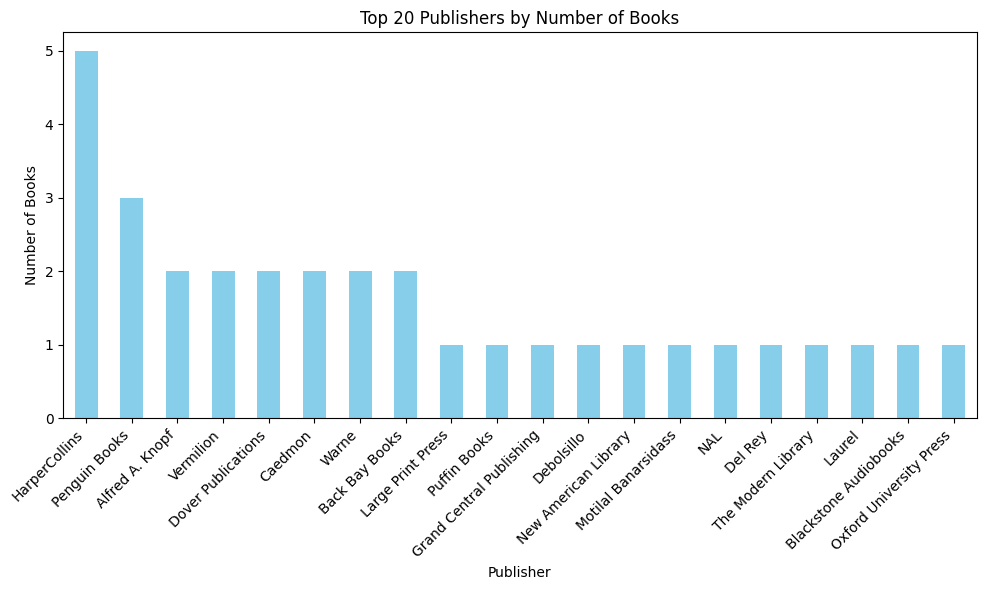

In [ ]:
author_counts = reading_inner_df['publisher'].value_counts()

# Select the top 20 authors based on book count
top_authors = author_counts.head(20)

# Create a histogram for the top 20 authors
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.title('Top 20 Publishers by Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Statistical Test

Regression Model with Quantitative Variables

In [ ]:
m0 = smf.ols(formula = 'average_rating ~ copiesSold + num_pages + ratings_count + year + ratings_count',data=reading_inner_df).fit()
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         average_rating   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.044
Date:                Wed, 24 Apr 2024   Prob (F-statistic):              0.390
Time:                        22:38:55   Log-Likelihood:                 27.323
No. Observations:                  82   AIC:                            -44.65
Df Residuals:                      77   BIC:                            -32.61
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.2149      0.857      6.086      0.000       3.509       6.921
copiesSold     7.518e-10   9.28e-10      0.810      0.421    -1.1e-09     2.6e-09
num_pages      9.444e-05      0.000      0.893      0.374      -0.000       0.000
ratings_count  1.795e-08   4.14e-08      0.434      0.666   -6.45e-08       1e-07
year             -0.0006      0.000     -1.400      0.166      -0.001       0.000
==============================================================================
Omnibus:                       14.039   Durbin-Watson:                   0.996
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                4.287
Skew:                          -0.186   Prob(JB):                        0.117
Kurtosis:                       1.944   Cond. No.                     1.72e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Regression Model With Authors

In [ ]:
m1 = smf.ols(formula = 'average_rating ~ copiesSold + num_pages + ratings_count + year + ratings_count + author',data=reading_inner_df).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         average_rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2776.
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.57e-53
Time:                        22:38:55   Log-Likelihood:                 359.39
No. Observations:                  82   AIC:                            -626.8
Df Residuals:                      36   BIC:                            -516.1
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                              -33.0544      0.603    -54.840      0.000     -34.277     -31.832
author[T.Alice Sebold]                                  -0.0085      0.045     -0.188      0.852      -0.101       0.084
author[T.Anna Sewell]                                    1.7232      0.049     34.987      0.000       1.623       1.823
author[T.Beatrix Potter]                                 1.5733      0.046     34.536      0.000       1.481       1.666
author[T.Carl Sagan]                                     0.0825      0.031      2.683      0.011       0.020       0.145
author[T.Colleen McCullough]                             0.4624      0.037     12.395      0.000       0.387       0.538
author[T.Dale Carnegie]                                  1.4923      0.057     26.145      0.000       1.377       1.608
author[T.Dan Brown]                                     -1.2379      0.011   -117.451      0.000      -1.259      -1.216
author[T.Daphne du Maurier]                              1.2300      0.047     26.023      0.000       1.134       1.326
author[T.Dr. Seuss]                                   1.822e-14   7.47e-16     24.372      0.000    1.67e-14    1.97e-14
author[T.E. B. White; illustrated by Garth Williams]     0.5584      0.030     18.624      0.000       0.498       0.619
author[T.Eric Carle]                                     0.4906      0.031     15.993      0.000       0.428       0.553
author[T.Ernest Hemingway]                               0.8141      0.054     15.107      0.000       0.705       0.923
author[T.F. Scott Fitzgerald]                            1.1428      0.050     23.038      0.000       1.042       1.243
author[T.Frank McCourt]                                  0.4011      0.046      8.648      0.000       0.307       0.495
author[T.George Orwell]                                  0.9783      0.046     21.359      0.000       0.885       1.071
author[T.Harper Lee]                                     0.6891      0.035     19.700      0.000       0.618       0.760
author[T.J. D. Salinger]                                -0.0593      0.019     -3.152      0.003      -0.098      -0.021
author[T.J. R. R. Tolkien]                               0.0469      0.005      9.337      0.000       0.037       0.057
author[T.James Redfield]                                -0.2448      0.038     -6.416      0.000      -0.322      -0.167
author[T.Jane Austen]                                    3.7286      0.086     43.296      0.000       3.554       3.903
author[T.Jhumpa Lahiri]                                  0.2791      0.042      6.627      0.000       0.194       0.365
author[T.John Steinbeck]                                 1

ANOVA TEST: Author and Average Rating

In [ ]:
grouped_data = [reading_inner_df[reading_inner_df['author'] == author]['average_rating'] for author in reading_inner_df['author'].unique()]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*grouped_data)

# Print results
print(f"ANOVA F-Statistic: {f_statistic}")
print(f"ANOVA p-value: {p_value}")

ANOVA F-Statistic: 13.048687806314893
ANOVA p-value: 1.6276713537724933e-13
